# Compare to baseline results

This script is used to generate plots/final results from raw results coming from simulations along with a set of results to use as a baseline

In [20]:
import os, sys
parent_dir = os.path.abspath('..')

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from math import ceil, floor
from numpy.random import default_rng
rng = default_rng()

import utils as src

In [22]:
print(list(np.round(np.logspace(-1, 0, 31), decimals=3))[::-1])

[1.0, 0.926, 0.858, 0.794, 0.736, 0.681, 0.631, 0.584, 0.541, 0.501, 0.464, 0.43, 0.398, 0.369, 0.341, 0.316, 0.293, 0.271, 0.251, 0.233, 0.215, 0.2, 0.185, 0.171, 0.158, 0.147, 0.136, 0.126, 0.117, 0.108, 0.1]


In [23]:
# Specify the methods to compare
method_keys = ['true', 
#                'cospar-st', 
#                'cospar-mt', 
#                'lineageot-st', 
               'lineageot-mt',
#                'cospar-mt-fitted'
              ]

In [24]:
result_keys = ['baseline', 'effect']
DIR = {
    'effect': "/media/becca/BECCA/present/simulation-study/merged-results-5x15-b0-8/",
    'baseline': "/media/becca/BECCA/present/simulation-study/merged-results-g6-5x15/"
      }

In [25]:
plt.style.use('plot_style.txt')

## Load the data

In [26]:
#Load the raw and baseline results files as dataframes
stats_dfs = {}
MT_census_dfs = {}
transition_table_dfs = {}
fate_dfs = {}
ancestor_dfs = {}
growth_dfs = {}
for k in result_keys: 
    RAW_RESULTS_DIR = DIR[k]
    
    stats_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "statistics.csv"))
    MT_census_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "MT_census.csv"))
    transition_table_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "transition_tables.csv"))
    fate_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "fate_probability_results.csv"))
    ancestor_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "ancestor_distribution_results.csv"))
    growth_dfs[k] = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "growth_statistics.csv"))

In [27]:
# Get the simulation, sampling rate and method info
for k in result_keys:
    stats_df = stats_dfs[k]
    
    simulation_keys = list(stats_df['Simulation'].unique())
    simulation_keys.sort()
    n_simulations = len(simulation_keys)

    sampling_rates = list(stats_df['Sample rate'].unique())
    sampling_rates.sort(reverse=True)
    sample_keys = [str(r) for r in sampling_rates]

    print(simulation_keys)
    print(sample_keys)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['1.0', '0.926', '0.858', '0.794', '0.736', '0.681', '0.631', '0.584', '0.541', '0.501', '0.464', '0.43', '0.398', '0.369', '0.341', '0.316', '0.293', '0.271', '0.251', '0.233', '0.215', '0.2', '0.185', '0.171', '0.158', '0.147', '0.136', '0.126', '0.117', '0.108', '0.1']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['1.0', '0.926', '0.858', '0.794', '0.736', '0.681', '0.631', '0.584', '0.541', '0.501', '0.464', '0.43', '0.398', '0.369', '0.341', '0.316', '0.293', '0.271', '0.251', '0.233', '0.215', '0.2', '0.185', '0.171', '0.158', '0.147', '0.136', '0.126', '0.117', '0.108', '0.1']


In [28]:
# Extract the time info
timepoints = list(stats_df['Order'].unique())
timepoints.sort()

assert len(timepoints) == 2
t1 = float(timepoints[0])
t2 = float(timepoints[1])

print(timepoints)

[1.0, 2.0]


In [29]:
# Get cell type information
cell_types_at_t1 = list(transition_table_dfs[k]['Cell type t1'].unique())
cell_types_at_t2 = list(transition_table_dfs[k]['Cell type t2'].unique())
cell_types = {str(t1): cell_types_at_t1, str(t2): cell_types_at_t2}

cell_types


{'1.0': ['progenitor', 'type A'], '2.0': ['type A', 'type B']}

In [30]:
# Specify the barcoding rate used (should change to save and extract from raw results)
barcode_rate=0.8

In [31]:
# Assign colors by cell type for plotting
celltype_color = {'progenitor': 'tab:green',
                  'type A': 'tab:red',
                  'type B': 'tab:blue'}

## Summarise that statistics of the simulated datasets

In [32]:
# Print the mean t2 sampling rates
t2_sample_keys = {}
for k in result_keys:
    print(k)
    stats_df = stats_dfs[k]
    
    values = []
    for r in sampling_rates:
        values.append(1000/stats_df[(stats_df['Sample rate'] == r) & (stats_df['Order'] == 2)]['N cells'].mean())

    print("Mean t2 sampling rates: ", np.round(np.array(values)*0.8, decimals=5))
    t2_sample_keys[k] = [str(r) for r in np.round(values, decimals=5)]

baseline
Mean t2 sampling rates:  [0.13333 0.12346 0.11416 0.10582 0.09804 0.09058 0.08396 0.0777  0.07199
 0.06667 0.06184 0.05727 0.05299 0.04916 0.04541 0.04209 0.03903 0.03611
 0.03343 0.03107 0.02866 0.02667 0.02465 0.0228  0.02106 0.0196  0.01813
 0.01679 0.0156  0.0144  0.01333]
effect
Mean t2 sampling rates:  [0.13976 0.13539 0.12585 0.11438 0.1105  0.09706 0.09416 0.08424 0.0793
 0.07285 0.06663 0.06367 0.0578  0.05402 0.0495  0.04495 0.04231 0.03909
 0.03628 0.03425 0.0306  0.02807 0.02696 0.0249  0.02303 0.02164 0.01969
 0.01805 0.01709 0.01581 0.01446]


In [33]:
for i in range(len(sampling_rates)):
    r = sampling_rates[i]
    r1 = np.float(t2_sample_keys['baseline'][i])
    r2 = np.float(t2_sample_keys['effect'][i])
    print(np.round(r*0.8, decimals=5), 
          np.round(r1*0.8, decimals=5), 
          np.round(r2*0.8, decimals=5))

0.8 0.13334 0.13976
0.7408 0.12346 0.13538
0.6864 0.11415 0.12585
0.6352 0.10582 0.11438
0.5888 0.09804 0.1105
0.5448 0.09058 0.09706
0.5048 0.08396 0.09416
0.4672 0.0777 0.08424
0.4328 0.07199 0.0793
0.4008 0.06666 0.07286
0.3712 0.06184 0.06663
0.344 0.05727 0.06367
0.3184 0.05299 0.05779
0.2952 0.04917 0.05402
0.2728 0.04542 0.0495
0.2528 0.04209 0.04495
0.2344 0.03903 0.04231
0.2168 0.03611 0.03909
0.2008 0.03343 0.03628
0.1864 0.03106 0.03425
0.172 0.02866 0.0306
0.16 0.02666 0.02807
0.148 0.02466 0.02696
0.1368 0.0228 0.0249
0.1264 0.02106 0.02303
0.1176 0.0196 0.02164
0.1088 0.01813 0.01969
0.1008 0.01679 0.01806
0.0936 0.0156 0.0171
0.0864 0.0144 0.01582
0.08 0.01334 0.01446


/home/becca/anaconda3/envs/clone-validation/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/home/becca/anaconda3/envs/clone-validation/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

In [34]:
(np.array(t2_sample_keys['effect'], dtype=float)*0.8 - 0.8*np.array(t2_sample_keys['baseline'], dtype=float))

array([0.006424, 0.011928, 0.011696, 0.00856 , 0.012456, 0.006488,
       0.0102  , 0.006536, 0.007312, 0.006192, 0.004792, 0.0064  ,
       0.0048  , 0.004856, 0.00408 , 0.002864, 0.00328 , 0.002976,
       0.002848, 0.003184, 0.001936, 0.001408, 0.002304, 0.002096,
       0.001976, 0.00204 , 0.00156 , 0.001264, 0.001496, 0.001416,
       0.00112 ])

In [50]:
sampling_rates*barcode_rate

TypeError: can't multiply sequence by non-int of type 'float'

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

baseline
Mean for progenitor = 6.0
Standard deviation for progenitor = 0.0
Mean for type A = 6.0
Standard deviation for type A = 0.0
effect
Mean for progenitor = 8.794637783835627
Standard deviation for progenitor = 1.613325936088756
Mean for type A = 2.2024843568659596
Standard deviation for type A = 1.6142135834964253


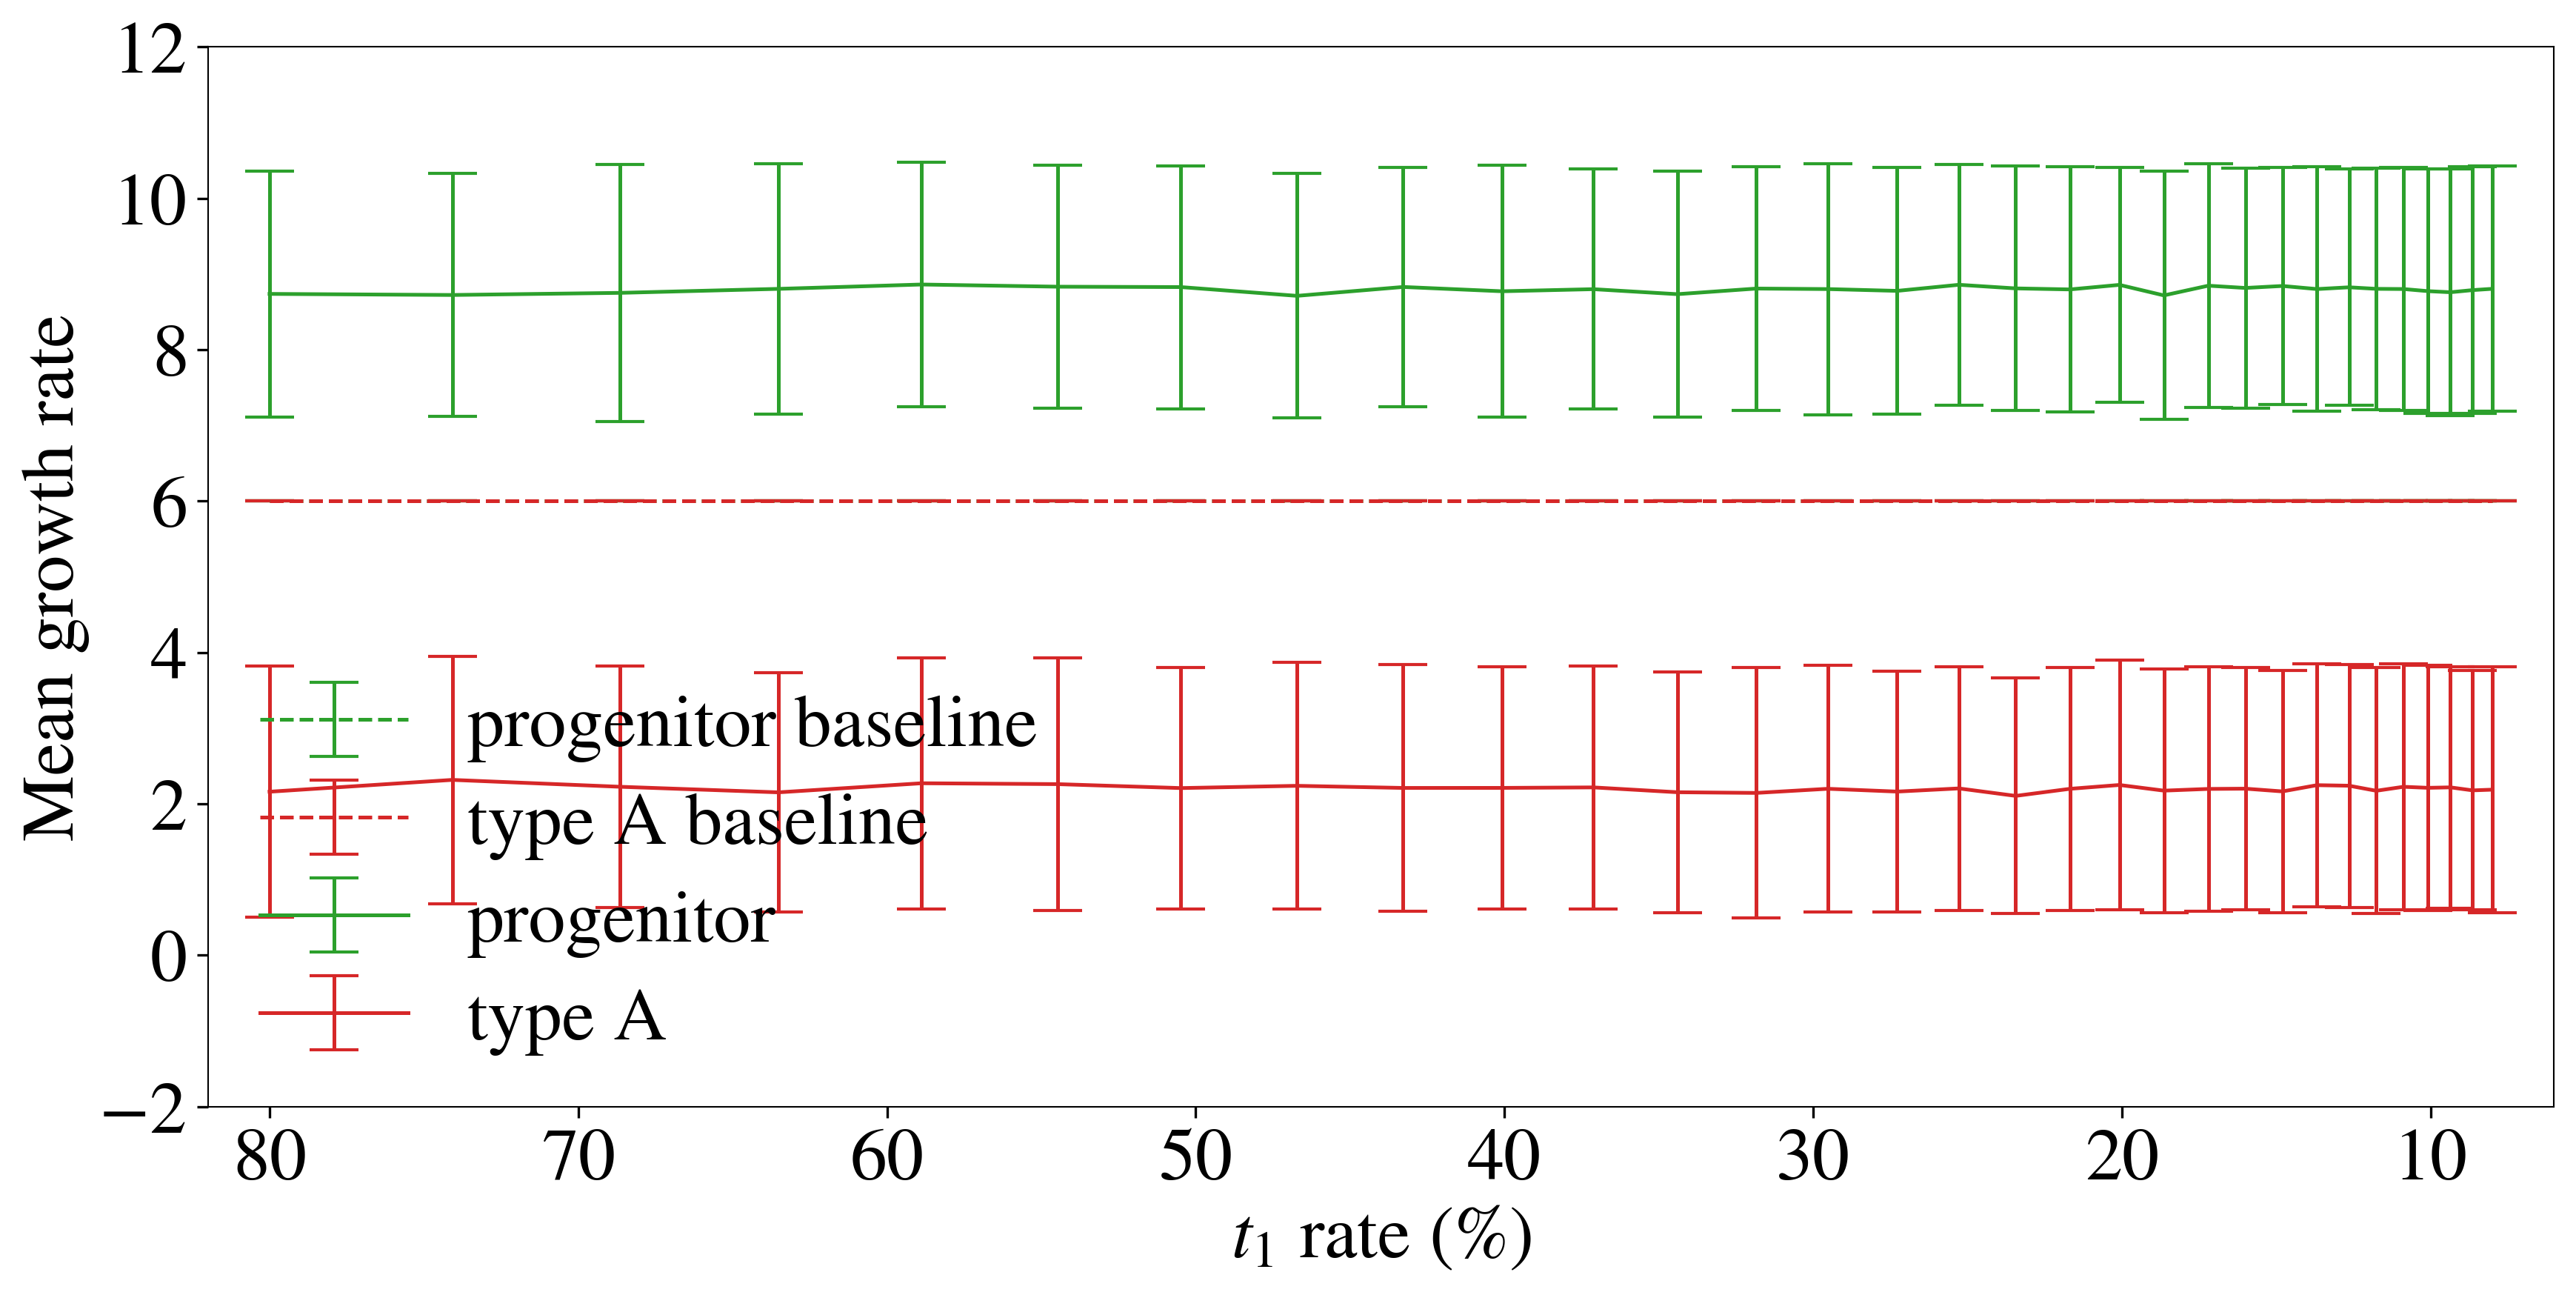

In [65]:
# Plot the mean growth rates over sampling rates
fig, ax = plt.subplots(figsize=(12,6))
fig.tight_layout()
# plt.title('Mean growth rate (over cells, over simulations)', fontweight="bold")
x_label_t1 = "$t_1$ rate (%)"
plt.xlabel(x_label_t1)
plt.ylabel("Mean growth rate")

# step=5

# sample_labels = 100*np.array(sampling_rates)*barcode_rate
# sample_labels = [str(s) for s in np.round(sample_labels[::step], decimals=1)]

sample_label_positions = np.arange(0.1, 0.9, 0.1)[::-1]
sample_labels = [str(int(100*s)) for s in sample_label_positions]

# ax.set_xticks(sampling_rates[::step], 
#            sample_labels )  # Set text labels
# ax.invert_xaxis()

xlims = (0.82, 0.06)
ax.set_xticks(sample_label_positions, sample_labels)
ax.set_xlim(xlims[0], xlims[1])

# Compute and plot the statistics
for k in result_keys:
    print(k)
    growth_df = growth_dfs[k]
    
    for i in range(len(cell_types_at_t1)):
        c = cell_types_at_t1[i]

        growth_mean = np.zeros(len(sampling_rates))
        growth_std = np.zeros(len(sampling_rates))

        c_mask = growth_df['Cell type'] == c

        for j in range(len(sampling_rates)):
            r = sampling_rates[j]
            mask = (growth_df['Sample rate'] == r) &\
                   (growth_df['Order'] == t1) & c_mask

            growth_mean[j] = growth_df[mask]['Growth mean'].mean()
            growth_std[j] = growth_df[mask]['Growth std'].mean()

        # Plot with errorbars
        if k == 'baseline':
            ax.errorbar([s*barcode_rate for s in sampling_rates], growth_mean, yerr=growth_std, 
                    capsize=8, color=celltype_color[c], label=c + ' ' + k, linestyle='--')
        else:
            ax.errorbar([s*barcode_rate for s in sampling_rates], growth_mean, yerr=growth_std, 
                    capsize=8, color=celltype_color[c], label=c)

        print("Mean for {} = {}".format(c, np.mean(growth_mean)))
        print("Standard deviation for {} = {}".format(c, np.mean(growth_std)))

ax.legend(framealpha=0.5)
plt.show()
    


## Plot the predicted MT-census proportions at $t_1$

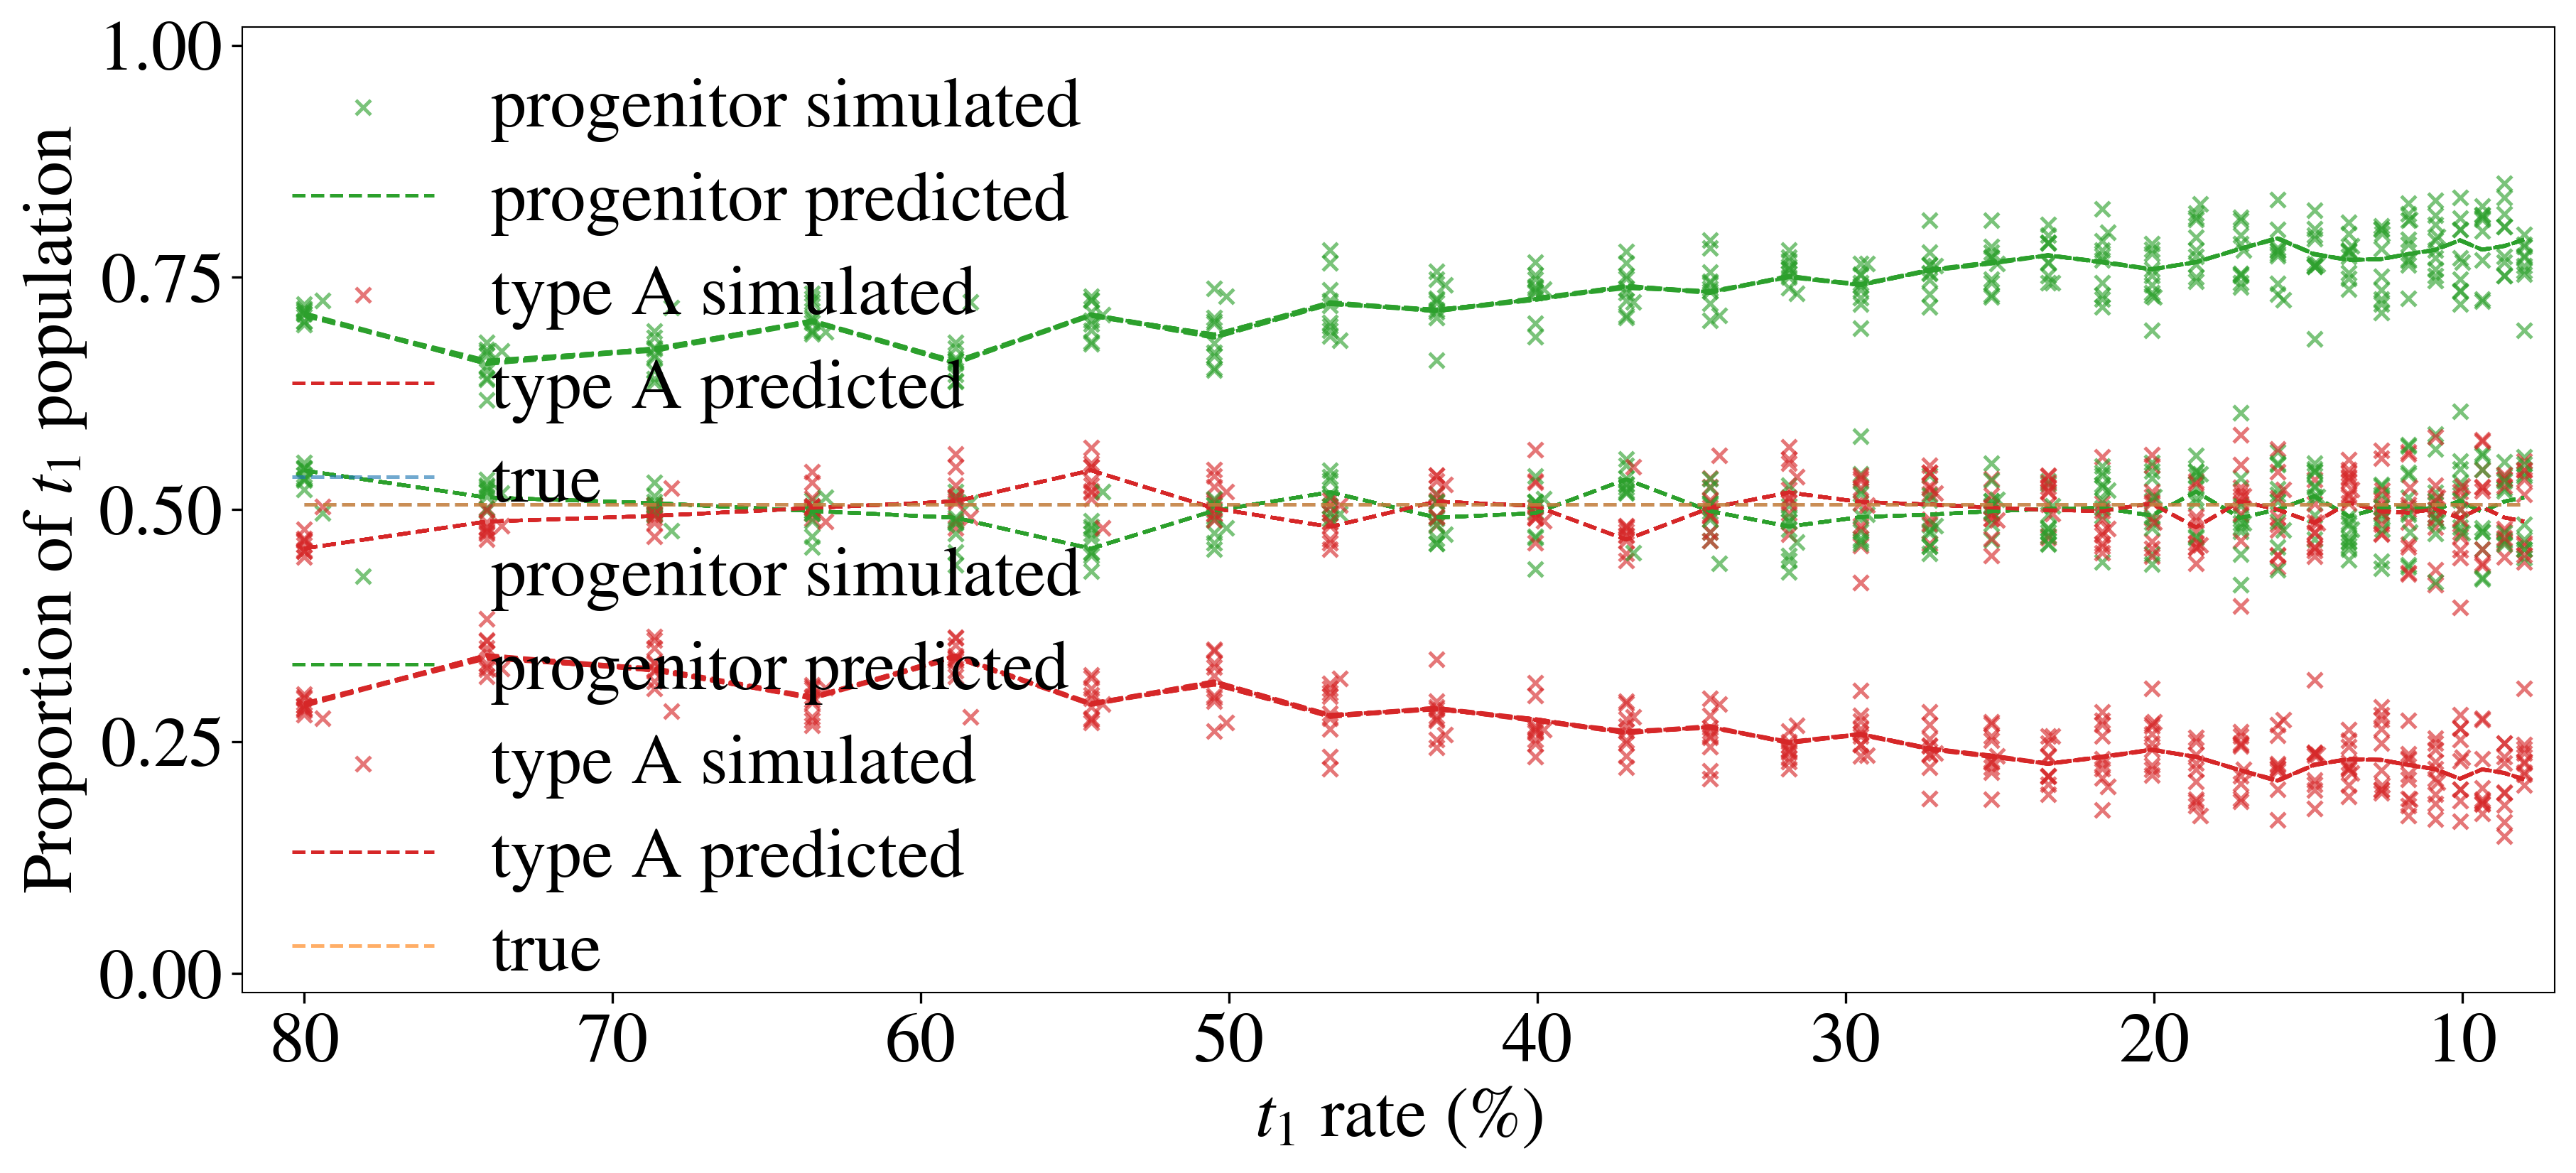

In [61]:
# Plot the cell census at different sampling rates against the predicted proportions
alpha = 0.2*((100/n_simulations)**(1/2))
# alpha=1.0

fig, ax = plt.subplots(figsize=(14, 6))
# plt.title("Cell type proportions in MT at t1, b = {}".format(barcode_rate), fontweight="bold")
plt.ylabel("Proportion of $t_1$ population")
plt.xlabel(x_label_t1)

for k in result_keys:
    MT_census_df = MT_census_dfs[k]
    
    for x in range(n_simulations):
        sim_key = x
        z_t1 = np.zeros((len(cell_types[str(t1)]), len(sampling_rates)))
        p_type_given_MT = np.zeros((len(cell_types[str(t1)]), len(sampling_rates)))

        for i in range(len(sampling_rates)):
            r = sampling_rates[i]
            rate_key = sample_keys[i]

            for j in range(len(cell_types[str(t1)])):
                c = cell_types[str(t1)][j]
                mask = (MT_census_df['Simulation'] == sim_key) &\
                       (MT_census_df['Sample rate'] == r) &\
                       (MT_census_df['Order'] == t1)
                z_t1[j, i] = MT_census_df[mask][c].iloc[0]
                p_type_given_MT[j, i] = MT_census_df[mask][c + ' predicted'].iloc[0]

        if x == n_simulations-1:

            for i in range(len(cell_types[str(t1)])):
                c = cell_types[str(t1)][i]
                plt.scatter(sampling_rates, z_t1[i], label=cell_types[str(t1)][i] + ' simulated', 
                            color=celltype_color[c], alpha=alpha, marker='x')
                plt.plot([s*barcode_rate for s in sampling_rates], p_type_given_MT[i], label=c + ' predicted', color=celltype_color[c], 
                         ls="--")

            # Fill array with true proportions for the simulation from that sampling rate
            true_proportion = np.zeros(len(sampling_rates))
            for i in range(len(sampling_rates)):
                mask = (stats_df['Simulation'] == sim_key) &\
                       (stats_df['Sample rate'] == r) &\
                       (stats_df['Order'] == t1)
                true_proportion[i] = stats_df[mask]['N progenitor'].iloc[0]/stats_df[mask]['N cells'].iloc[0]   # assumes just two types at t1

            plt.plot([s*barcode_rate for s in sampling_rates], true_proportion, alpha=alpha, ls="--", label='true')

        else:
            for i in range(len(cell_types[str(t1)])):
                c = cell_types[str(t1)][i]
                plt.scatter([s*barcode_rate for s in sampling_rates], z_t1[i], color=celltype_color[c], alpha=alpha, marker='x')
                plt.plot([s*barcode_rate for s in sampling_rates], p_type_given_MT[i], color=celltype_color[c], ls="--")

# Set the x-tick labels
# ax.set_xticks(sampling_rates[::step], 
#            sample_labels )  # Set text labels
# ax.invert_xaxis()
# ax.set_xlim(1.02, 0.08)
ax.set_xticks(sample_label_positions, sample_labels)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(-0.02, 1.02)
            
ax.legend(framealpha=0.2)
plt.show()

## Plot the entries of the mean transition tables over the sampling rate

In [62]:
# Plot each entry of the mean transition tables over the sampling rate
# Use a dropdown to select which entry
ancestor_dropdown = widgets.Dropdown(
    options=cell_types_at_t1,
    description='State at t1:',
    value='type A'
)

fate_dropdown = widgets.Dropdown(
    options=cell_types_at_t2,
    description='State at t2:',
    value='type A'
)

def update_transition_mass_vs_sampling_rate(state_t1, state_t2):
    df_baseline = transition_table_dfs['baseline']
    df_effect = transition_table_dfs['effect']
    
    value_key = 'Transition mass'
    
    fig, ax = plt.subplots(figsize=(14,6))
    fig.tight_layout()
    
    # Set the x-tick labels
#     ax.set_xticks(sampling_rates[::step], 
#                sample_labels )  # Set text labels
#     ax.invert_xaxis()
#     ax.set_xlim(1.02, 0.08)
#     ax.set_ylim(-2.0, 2.0)
    ax.set_xticks(sample_label_positions, sample_labels)
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_xlabel(x_label_t1)
    ax.set_ylabel("Log ratio of mass transported, effect/baseline")

    y_mean = {}
    y_std = {}

    for method in method_keys:
        y_mean[method] = []
        y_std[method] = []
        
        if method == 'lineageot-mt':
            line=''
            marker=None
            capsize=0
            label=None
            y_mean[method] = np.ones_like(sampling_rates)*1.0
            y_std[method] = np.zeros_like(sampling_rates)
        
        else:

            for r in sampling_rates:
                df = df_baseline
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                                   (df['Cell type t1'] == state_t1) & (df['Cell type t2'] == state_t2)
                values_baseline = df[mask][value_key]

                df = df_effect
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                                   (df['Cell type t1'] == state_t1) & (df['Cell type t2'] == state_t2)
                values_effect = df[mask][value_key]

                ratio = np.log(np.divide(values_effect, values_baseline))

                y_mean[method].append(ratio.mean())
                y_std[method].append(ratio.std())

                line = None
                marker = 'x'
                capsize=8
                label = method
                
        ax.errorbar([s*barcode_rate for s in sampling_rates], y_mean[method], yerr=y_std[method], 
                     label=label, linestyle=line, marker=marker, capsize=capsize)
        
    ax.legend(framealpha=0.5)
    
widgets.interact(update_transition_mass_vs_sampling_rate, state_t1=ancestor_dropdown, state_t2=fate_dropdown)

interactive(children=(Dropdown(description='State at t1:', index=1, options=('progenitor', 'type A'), value='t…

<function __main__.update_transition_mass_vs_sampling_rate(state_t1, state_t2)>

## Plot the correlation and Wasserstein distance between the true and estimated fate probabilites over sampling rate

In [66]:
# Plot correlation between true and estimated fate probabilities over sampling rate

linestyles = {'baseline': '--', 'effect': '-'}
effect_colours = {'baseline': 'limegreen', 'effect': 'tab:green'}

method_colours = {
#     'lineageot-st': 'tab:red', 
    'lineageot-mt': 'tab:purple', 
#                   'cospar-mt': 'tab:green', 
#         'cospar-mt-fitted': 'tab:red',
#     'cospar-st': 'tab:orange', 
    'true': 'tab:blue'}
effect_alpha = {'baseline': 0.6, 'effect': 1.0}
ylims = (0.38, 1.0)

def update_fate_corr_plot(l):
    value_key = 'Fate probability correlation'
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.tight_layout()
#     plt.title("Correlation with true fate probability (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
#     ax.set_xticks(sampling_rates[::step], 
#                sample_labels )  # Set text labels
#     ax.invert_xaxis()
#     ax.set_xlim(1.02, 0.08)
    ax.set_xticks(sample_label_positions, sample_labels)
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(x_label_t1)
    ax.set_ylabel("Correlation")

    y_mean = {}
    y_std = {}
    
    for df_key in ['baseline', 'effect']:
        for method in method_keys:
            y_mean[method] = []
            y_std[method] = []

            if method == 'true':
                line=''
                marker=None
                capsize=0
                label=None
                y_mean[method] = np.ones_like(sampling_rates)
                y_std[method] = np.zeros_like(sampling_rates)

#             elif method == 'cospar-mt' or method == 'lineageot-st' or method == 'cospar-st':
#                 line=''
#                 marker=None
#                 capsize=0
#                 label=None
#                 y_mean[method] = np.ones_like(sampling_rates)*1.0
#                 y_std[method] = np.zeros_like(sampling_rates)

            else:
                for r in sampling_rates:
                    df = fate_dfs[df_key]
                    mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                        (df['Cell type t2'] == l)
                    values = df[mask][value_key]

                    y_mean[method].append(values.mean())
                    y_std[method].append(values.std())

                    line = linestyles[df_key]
                    marker = 'x'
                    capsize=8
                    if method == 'cospar-st': 
                        label = 'CoSpar-ST' + ' ' + df_key
                    if method == 'cospar-mt': 
                        label = 'CoSpar-MT' + ' ' + df_key
                    elif method == 'lineageot-st':
                        label = 'LineageOT' + ' ' + df_key
                    elif method == 'lineageot-mt':
                        label = 'LineageOT-MT' + ' ' + df_key
                    elif method == 'cospar-mt-fitted':
                        label = 'CoSpar-MT-IPF' + ' ' + df_key


            ax.errorbar([s*barcode_rate for s in sampling_rates], y_mean[method], yerr=y_std[method], 
                         label=label, linestyle=line, marker=marker, capsize=capsize, 
                         c=method_colours[method], alpha=effect_alpha[df_key])
        
    ax.legend(ncol=2, loc='lower left')
    
        
widgets.interact(update_fate_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_fate_corr_plot(l)>

In [43]:
# Plot correlation between true and estimated fate probabilities over sampling rate

linestyles = {'baseline': '--', 'effect': '-'}
method_colours = {
#     'lineageot-st': 'tab:red', 'lineageot-mt': 'tab:purple', 
                  'cospar-mt': 'tab:green', 
        'cospar-mt-fitted': 'tab:red',
#     'cospar-st': 'tab:orange', 
    'true': 'tab:blue'}
effect_alpha = {'baseline': 0.6, 'effect': 1.0}

def update_fate_corr_plot(l):
    value_key = 'Fate probability correlation'
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.tight_layout()
#     plt.title("Correlation with true fate probability (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(-0.02, 1.02)
    ax.set_xlabel(x_label_t1)
    ax.set_ylabel("Correlation")

    y_mean = {}
    y_std = {}
    
    for df_key in ['baseline', 'effect']:
        for method in method_keys:
            y_mean[method] = []
            y_std[method] = []

            if method == 'true':
                line=''
                marker=None
                capsize=0
                label=None
                y_mean[method] = np.ones_like(sampling_rates)
                y_std[method] = np.zeros_like(sampling_rates)

#             elif method == 'lineageot-mt' or method == 'cospar-mt':
#                 line=''
#                 marker=None
#                 capsize=0
#                 label=None
#                 y_mean[method] = np.ones_like(sampling_rates)*1.0
#                 y_std[method] = np.zeros_like(sampling_rates)

            else:
                for r in sampling_rates:
                    df = fate_dfs[df_key]
                    mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                        (df['Cell type t2'] == l)
                    values = df[mask][value_key]

                    y_mean[method].append(values.mean())
                    y_std[method].append(values.std())

                    line = linestyles[df_key]
                    marker = 'x'
                    capsize=8
                    if method == 'cospar-st': 
                        label = 'CoSpar-ST' + ' ' + df_key
                    elif method == 'lineageot-st':
                        label = 'LineageOT' + ' ' + df_key
                    elif method == 'cospar-mt-fitted':
                        label = 'CoSpar-MT-IPF' + ' ' + df_key
                    elif method == 'cospar-mt': 
                        label = 'CoSpar-MT' + ' ' + df_key


            ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                         label=label, linestyle=line, marker=marker, capsize=capsize, 
                            c=method_colours[method], alpha=effect_alpha[df_key])
        
    ax.legend(loc=(0.01, 0.5), ncol=2)
    
        
widgets.interact(update_fate_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_fate_corr_plot(l)>

In [38]:
# Plot Wasserstein distance between the true and estimated fate probabilities over sampling rate
def update_fate_corr_plot(l):
    df_baseline = fate_dfs['baseline']
    df_effect = fate_dfs['effect']
    
    value_key = 'Fate probability W-distance'
    
    fig, ax = plt.subplots(figsize=(16,8))
    fig.tight_layout()
#     plt.title("Wasserstein distance to the true fate probability (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(-4.0, 4.0)
    ax.set_xlabel(x_label_t1)

    y_mean = {}
    y_std = {}

    for method in method_keys:
        y_mean[method] = []
        y_std[method] = []

        if method == 'true':
            line='--'
            marker=None
            capsize=0
            label=None
            y_mean[method] = np.zeros_like(sampling_rates)
            y_std[method] = np.zeros_like(sampling_rates)

        else:
            for r in sampling_rates:
                df = df_baseline
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                    (df['Cell type t2'] == l)
                values_baseline = df[mask][value_key]
                
                df = df_effect
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                    (df['Cell type t2'] == l)
                values_effect = df[mask][value_key]
                
                ratio = np.log(np.divide(values_effect, values_baseline))
                
                y_mean[method].append(ratio.mean())
                y_std[method].append(ratio.std())
                
                line = None
                marker = 'x'
                capsize=8
                label = method
            
        ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                     label=label, linestyle=line, marker=marker, capsize=capsize)
        

    ax.set_ylabel("Log ratio of Wasserstein distance, effect/baseline")
    ax.legend(framealpha=0.5)
    
        
widgets.interact(update_fate_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_fate_corr_plot(l)>

## Plot the correlation and Wasserstein distance between the true and estimated ancestor distributions over sampling rate

In [44]:
# Plot correlation between true and estimated ancestor distributions over sampling rate
def update_ancestor_corr_plot(l):
    value_key = 'Ancestor distribution correlation'
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.tight_layout()
#     plt.title("Correlation with true ancestor distribution (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(0.15, 1.02)
    ax.set_xlabel(x_label_t1)
    ax.set_ylabel("Correlation")

    y_mean = {}
    y_std = {}

    for df_key in ['baseline', 'effect']:
        for method in method_keys:
            y_mean[method] = []
            y_std[method] = []

            if method == 'true':
                line=''
                marker=None
                capsize=0
                label=None
                y_mean[method] = np.ones_like(sampling_rates)
                y_std[method] = np.zeros_like(sampling_rates)

            elif method == 'cospar-st':
                line=''
                marker=None
                capsize=0
                label=None
                y_mean[method] = np.ones_like(sampling_rates)*1.0
                y_std[method] = np.zeros_like(sampling_rates)

            else:
                for r in sampling_rates:
                    df = ancestor_dfs[df_key]
                    mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                        (df['Cell type t2'] == l)
                    values = df[mask][value_key]

                    y_mean[method].append(values.mean())
                    y_std[method].append(values.std())

                    line = linestyles[df_key]
                    marker = 'x'
                    capsize=8
                    if method == 'cospar-mt': 
                        label = 'CoSpar-MT' + ' ' + df_key
                    elif method == 'lineageot-st':
                        label = 'LineageOT' + ' ' + df_key
                    elif method == 'lineageot-mt':
                        label = 'LineageOT-MT' + ' ' + df_key
                    elif method == 'cospar-mt-fitted':
                        label = 'CoSpar-MT-IPF' + ' ' + df_key


            ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                         label=label, linestyle=line, marker=marker, capsize=capsize, 
                        c=method_colours[method], alpha=effect_alpha[df_key])
        
    ax.legend(ncol=2)
        
widgets.interact(update_ancestor_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_ancestor_corr_plot(l)>

In [147]:
def update_ancestor_corr_plot(l):
    value_key = 'Ancestor distribution correlation'
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.tight_layout()
#     plt.title("Correlation with true fate probability (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(-0.4, 1.0)
    ax.set_xlabel(x_label_t1)
    ax.set_ylabel("Correlation")

    y_mean = {}
    y_std = {}
    
    for df_key in ['baseline', 'effect']:
        for method in method_keys:
            y_mean[method] = []
            y_std[method] = []

            if method == 'true':
                line=''
                marker=None
                capsize=0
                label=None
                y_mean[method] = np.ones_like(sampling_rates)
                y_std[method] = np.zeros_like(sampling_rates)

            elif method == 'lineageot-mt' or method == 'cospar-mt':
                line=''
                marker=None
                capsize=0
                label=None
                y_mean[method] = np.ones_like(sampling_rates)*1.0
                y_std[method] = np.zeros_like(sampling_rates)

            else:
                for r in sampling_rates:
                    df = ancestor_dfs[df_key]
                    mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                        (df['Cell type t2'] == l)
                    values = df[mask][value_key]

                    y_mean[method].append(values.mean())
                    y_std[method].append(values.std())

                    line = linestyles[df_key]
                    marker = 'x'
                    capsize=8
                    if method == 'cospar-st': 
                        label = 'CoSpar-ST' + ' ' + df_key
                    elif method == 'lineageot-st':
                        label = 'LineageOT' + ' ' + df_key


            ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                         label=label, linestyle=line, marker=marker, capsize=capsize, 
                            c=method_colours[method], alpha=effect_alpha[df_key])
        
    ax.legend(loc=(0.02, 0.55), ncol=2)
    
        
widgets.interact(update_ancestor_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_ancestor_corr_plot(l)>

In [148]:
# Plot Wasserstein distance between the true and estimated ancestor distributions over sampling rate
def update_fate_corr_plot(l):
    df_baseline = ancestor_dfs['baseline']
    df_effect = ancestor_dfs['effect']
    
    value_key = 'Ancestor distribution W-distance'
    
    fig, ax = plt.subplots(figsize=(16,8))
    fig.tight_layout()
#     plt.title("Wasserstein distance to the true ancestor distribution (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(-2.0, 10.0)
    ax.set_xlabel(x_label_t1)

    y_mean = {}
    y_std = {}

    for method in method_keys:
        y_mean[method] = []
        y_std[method] = []

        if method == 'true':
            line='--'
            marker=None
            capsize=0
            label=None
            y_mean[method] = np.zeros_like(sampling_rates)
            y_std[method] = np.zeros_like(sampling_rates)

        else:
            for r in sampling_rates:
                df = df_baseline
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                    (df['Cell type t2'] == l)
                values_baseline = df[mask][value_key]
                
                df = df_effect
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                    (df['Cell type t2'] == l)
                values_effect = df[mask][value_key]
                
                ratio = np.log(np.divide(values_effect, values_baseline))
                
                y_mean[method].append(ratio.mean())
                y_std[method].append(ratio.std())
                
                line = None
                marker = 'x'
                capsize=8
                label = method
            
        ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                     label=label, linestyle=line, marker=marker, capsize=capsize)
        
    ax.set_ylabel("Log ratio of Wasserstein distance, effect/baseline")
    ax.legend(framealpha=0.5)
    
        
widgets.interact(update_fate_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_fate_corr_plot(l)>